In [1]:
import pandas as pd
df = pd.read_json(r"C:\ncf-recommend-project\data\raw\electronics_5.json", lines=True)


In [2]:
df.isnull().sum()
df.shape

(1689188, 9)

In [3]:
#select the columns 
df1=df[['reviewerID','asin','overall','unixReviewTime']]
#rename the select the columns
df1=df1.rename(columns={
    'reviewerID':'user_Id',
    'asin': 'item_id',
    'overall': 'rating',
    'unixReviewTime': 'timestamp'
})
df1.head(10)
df1.isnull().sum()


user_Id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [4]:
#removes rows with missing values in both columns 
df1=df1.dropna(subset=['user_Id','item_id'])


In [5]:
#changing values in timestamp columns to integers 
df1['timestamp'] = df1['timestamp'].astype(int)
df1

,user_Id,item_id,rating,timestamp
0,AO94DHGC771SJ,0528881469,5,1370131200
1,AMO214LNFCEI4,0528881469,1,1290643200
2,A3N7T0DY83Y4IG,0528881469,3,1283990400
3,A1H8PY3QHMQQA0,0528881469,2,1290556800
4,A24EV6RXELQZ63,0528881469,1,1317254400
...,...,...,...,...
1689183,A34BZM6S9L7QI4,B00LGQ6HL8,5,1405555200
1689184,A1G650TTTHEAL5,B00LGQ6HL8,5,1405382400
1689185,A25C2M3QF9G7OQ,B00LGQ6HL8,5,1405555200
1689186,A1E1LEVQ9VQNK,B00LGQ6HL8,5,1405641600


In [6]:
#sort the dataset by user_id and timestamp
#first by user_id and next by timestamp
df1 = df1.sort_values(by=['user_Id', 'timestamp'])
df1.head(10)

,user_Id,item_id,rating,timestamp
321546,A000715434M800HLCENK9,B000UYYZ0M,1,1400457600
450446,A000715434M800HLCENK9,B001EHAI6Y,5,1400457600
738088,A000715434M800HLCENK9,B003AFONFU,3,1400457600
766200,A000715434M800HLCENK9,B003ES5ZUU,2,1400457600
1678142,A000715434M800HLCENK9,B00HMZG3YS,5,1400457600
1583124,A00101847G3FJTWYGNQA,B00C7NSIO8,5,1379548800
1682775,A00101847G3FJTWYGNQA,B00IBPLI48,4,1379548800
1125372,A00101847G3FJTWYGNQA,B005F778JO,5,1384041600
1243310,A00101847G3FJTWYGNQA,B006T9B6R2,5,1385769600
1479771,A00101847G3FJTWYGNQA,B009NB8WR0,5,1385769600


In [7]:
#Encode user_id
from sklearn.preprocessing import LabelEncoder
user_encoder=LabelEncoder()
df1['user_encoded']=user_encoder.fit_transform(df1['user_Id'])

#item encode
item_encoder = LabelEncoder()
df1['item_encoded'] = item_encoder.fit_transform(df1['item_id'])

df1[['user_Id', 'user_encoded', 'item_id', 'item_encoded']].head(20)


,user_Id,user_encoded,item_id,item_encoded
321546,A000715434M800HLCENK9,0,B000UYYZ0M,13179
450446,A000715434M800HLCENK9,0,B001EHAI6Y,17993
738088,A000715434M800HLCENK9,0,B003AFONFU,28326
766200,A000715434M800HLCENK9,0,B003ES5ZUU,29247
1678142,A000715434M800HLCENK9,0,B00HMZG3YS,62275
1583124,A00101847G3FJTWYGNQA,1,B00C7NSIO8,58134
1682775,A00101847G3FJTWYGNQA,1,B00IBPLI48,62555
1125372,A00101847G3FJTWYGNQA,1,B005F778JO,41862
1243310,A00101847G3FJTWYGNQA,1,B006T9B6R2,46010
1479771,A00101847G3FJTWYGNQA,1,B009NB8WR0,54171


In [8]:
import numpy as np

# create containers
train_rows = []
val_rows = []
test_rows = []

groups=df1.groupby('user_Id')

for user, group in groups:
    if len(group) < 3:
        # not enough interactions → skip user
        continue

    # convert group to numpy for indexing
    items = group.index

    test_rows.append(items[-1])      # last item
    val_rows.append(items[-2])       # second last item
    train_rows.extend(items[:-2])    # all except last two


In [9]:
train_df = df1.loc[train_rows]
val_df   = df1.loc[val_rows]
test_df  = df1.loc[test_rows]


In [10]:
train_df

,user_Id,item_id,rating,timestamp,user_encoded,item_encoded
321546,A000715434M800HLCENK9,B000UYYZ0M,1,1400457600,0,13179
450446,A000715434M800HLCENK9,B001EHAI6Y,5,1400457600,0,17993
738088,A000715434M800HLCENK9,B003AFONFU,3,1400457600,0,28326
1583124,A00101847G3FJTWYGNQA,B00C7NSIO8,5,1379548800,1,58134
1682775,A00101847G3FJTWYGNQA,B00IBPLI48,4,1379548800,1,62555
...,...,...,...,...,...,...
1399459,AZZYW4YOE1B6E,B008I643DS,5,1388534400,192402,51306
1358363,AZZYW4YOE1B6E,B0082YEH8M,4,1389744000,192402,49816
1569672,AZZYW4YOE1B6E,B00BP5MB56,3,1389744000,192402,57576
574811,AZZYW4YOE1B6E,B0029LB5D4,5,1396396800,192402,22519


In [11]:
import numpy as np

#group the user_encoded and item_encoded and apply the  set to remove the duplicate and convert into dictionary. 
user_items = df1.groupby('user_encoded')['item_encoded'].apply(set).to_dict()
#returns all unique items in the dataset and converts it into a NumPy array
all_items = np.array(df1['item_encoded'].unique())

In [12]:
neg_users = []
neg_items = []
neg_labels = []

num_neg = 3   # negatives per positive

for user in train_df['user_encoded'].unique():
    positives = user_items[user]

    # sample candidates
    sampled = np.random.choice(all_items, size=num_neg * 2, replace=True)

    # remove positives
    negatives = [item for item in sampled if item not in positives]

    # keep exactly num_neg
    negatives = negatives[:num_neg]

    # store negative triples
    for neg in negatives:
        neg_users.append(user)
        neg_items.append(neg)
        neg_labels.append(0)


In [13]:
pos_users = train_df['user_encoded'].values
pos_items = train_df['item_encoded'].values
pos_labels = np.ones_like(pos_users)


In [14]:
neg_users = np.array(neg_users)
neg_items = np.array(neg_items)
neg_labels = np.array(neg_labels)


In [15]:
X_train_user = np.concatenate([pos_users, neg_users])
X_train_item = np.concatenate([pos_items, neg_items])
y_train = np.concatenate([pos_labels, neg_labels])
X_train_user

array([     0,      0,      0, ..., 192402, 192402, 192402])

In [16]:
train_df['label'] = 1
val_df['label'] = 1
test_df['label'] = 1

X_val_user = val_df['user_encoded'].values
X_val_item = val_df['item_encoded'].values
y_val = val_df['label'].values

X_test_user = test_df['user_encoded'].values
X_test_item = test_df['item_encoded'].values
y_test = test_df['label'].values


In [17]:
print("Train shapes:", X_train_user.shape, X_train_item.shape, y_train.shape)
print("Val shapes:", X_val_user.shape, X_val_item.shape, y_val.shape)
print("Test shapes:", X_test_user.shape, X_test_item.shape, y_test.shape)

num_users = df1['user_encoded'].nunique()
num_items = df1['item_encoded'].nunique()

print("Users:", num_users)
print("Items:", num_items)


Train shapes: (1881591,) (1881591,) (1881591,)
Val shapes: (192403,) (192403,) (192403,)
Test shapes: (192403,) (192403,) (192403,)
Users: 192403
Items: 63001


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

embedding_dim = 32


# User input
user_input = layers.Input(shape=(1,), name='user_input')
user_embedding = layers.Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
user_vec = layers.Flatten()(user_embedding)

# Item input
item_input = layers.Input(shape=(1,), name='item_input')
item_embedding = layers.Embedding(input_dim=num_items, output_dim=embedding_dim, name='item_embedding')(item_input)
item_vec = layers.Flatten()(item_embedding)

# Concatenate both embeddings
concat = layers.Concatenate()([user_vec, item_vec])

# MLP layers
dense1 = layers.Dense(128, activation='relu')(concat)
dense2 = layers.Dense(64, activation='relu')(dense1)
dense3 = layers.Dense(32, activation='relu')(dense2)

# Final output (probability)
output = layers.Dense(1, activation='sigmoid')(dense3)

# Build model
model = keras.Model(inputs=[user_input, item_input], outputs=output)

model.summary()





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 item_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 user_embedding (Embedding)  (None, 1, 32)                6156896   ['user_input[0][0]']          
                                                                                                  
 item_embedding (Embedding)  (None, 1, 32)                2016032   ['item_input[0][0]']          
                                                                                            

In [19]:
#compiling the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [20]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=2,
        restore_best_weights=True
    ),
    
    tf.keras.callbacks.ModelCheckpoint(
        filepath='../saved_models/ncf_best_model.h5',
        save_best_only=True,
        monitor='val_loss'
    )
]


In [21]:
#train the model
history = model.fit(
    x=[X_train_user, X_train_item],
    y=y_train,
    validation_data=([X_val_user, X_val_item], y_val),
    epochs=10,
    batch_size=2048,
    callbacks=callbacks
)


Epoch 1/10


919/919 [==============================] - 37s 39ms/step - loss: 0.5042 - accuracy: 0.7313 - val_loss: 0.3610 - val_accuracy: 0.7872
Epoch 2/10


c:\Users\Mukundhan\anaconda3\envs\recommend\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


919/919 [==============================] - 35s 38ms/step - loss: 0.4472 - accuracy: 0.7801 - val_loss: 0.3896 - val_accuracy: 0.7834
Epoch 3/10
919/919 [==============================] - 35s 38ms/step - loss: 0.3299 - accuracy: 0.8533 - val_loss: 0.4864 - val_accuracy: 0.7783


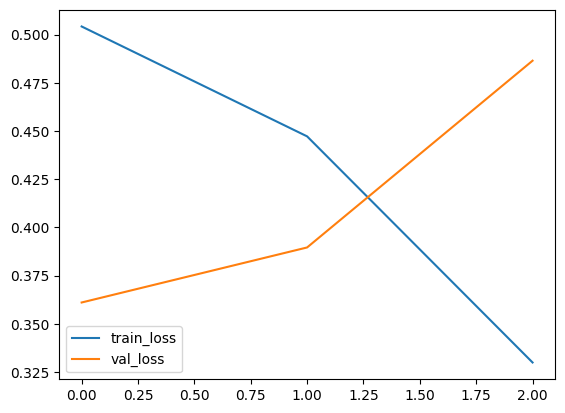

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [23]:
print(len(neg_users), len(neg_items), len(neg_labels))
print(neg_labels[:20])


577209 577209 577209
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
print(len(pos_users), len(neg_users))
print(len(X_train_user), len(X_train_item), len(y_train))
print(np.unique(y_train))


1304382 577209
1881591 1881591 1881591
[0 1]


In [25]:
print("Total:", len(y_train))
print("Unique:", np.unique(y_train, return_counts=True))


Total: 1881591
Unique: (array([0, 1]), array([ 577209, 1304382], dtype=int64))


In [26]:
#evaluate the model
test_loss, test_acc = model.evaluate(
    [X_test_user, X_test_item], 
    y_test
)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


6013/6013 [==============================] - 8s 1ms/step - loss: 0.4043 - accuracy: 0.7441
Test Loss: 0.40425586700439453
Test Accuracy: 0.7441307902336121


In [27]:
#prediction using user_id 
user_Id=100
df1[df1['user_encoded'] == user_Id].head()
user_positive_items = user_items[user_Id]
candidate_items = np.array([item for item in all_items if item not in user_positive_items])
user_array = np.array([user_Id] * len(candidate_items))

scores = model.predict(
    [user_array, candidate_items],
    batch_size=2048,
    verbose=0
)
top_indices = np.argsort(scores.flatten())[::-1][:10]
top_items = candidate_items[top_indices]
recommended_asins = item_encoder.inverse_transform(top_items)
recommended_asins

meta = pd.read_csv(r"C:\ncf-recommend-project\data\raw\Amazon Electronics Metadata.csv")

# Keep asin + title only
meta = meta[['asin', 'title']]
meta.head()
rec_df = pd.DataFrame({'asin': recommended_asins})
rec_with_titles = rec_df.merge(meta, on='asin', how='left')
rec_with_titles





,asin,title
0,B007WTAJTO,SanDisk Ultra 64GB MicroSDXC Class 10 UHS Memo...
1,B0002L5R78,DVI Gear HDMI Cable 2M 6 feet
2,B003ES5ZUU,AmazonBasics High-Speed HDMI Cable - 15 Feet (...
3,B002WE6D44,Transcend 8 GB Class 10 SDHC Flash Memory Card...
4,B00622AG6S,PowerGen 2.4Amps / 12W Dual USB Car charger De...
5,B005CT56F8,Seagate Barracuda 320 GB HDD SATA 6 Gb/s NCQ 6...
6,B0019EHU8G,Mediabridge ULTRA Series HDMI Cable (6 Feet) -...
7,B005DKZTMG,Logitech Wireless Touch Keyboard K400 with Bui...
8,B005FYNSPK,SanDisk Cruzer Fit 4GB USB 2.0 Low-Profile Fla...
9,B0015DYMVO,Belkin 3-Outlet Mini Travel Swivel Charger Sur...
